## Libraries

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
pip install category_encoders

In [ ]:
pip install xgboost

In [27]:
pip install scikit-optimize

Defaulting to user installation because normal site-packages is not writeable

   -------------------- ------------------- 1/2 [scikit-optimize]
   -------------------- ------------------- 1/2 [scikit-optimize]
   ---------------------------------------- 2/2 [scikit-optimize]

Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


## Data

In [2]:
path = '../Datasets/bank-additional-full.csv'
df = pd.read_csv(path, delimiter=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
df.shape

(41188, 21)

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
41183    False
41184    False
41185    False
41186    False
41187    False
Length: 41188, dtype: bool

## Feature Engineering

In [8]:
drop = ['duration','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

In [9]:
df = df.drop(columns=drop).rename(columns={'y':'result'})

In [10]:
df['result'] = df['result'].replace({'yes':1, 'no':0})

## EDA (Exploratory Data Analysis)

In [13]:
df['result'].value_counts()

result
0    36548
1     4640
Name: count, dtype: int64

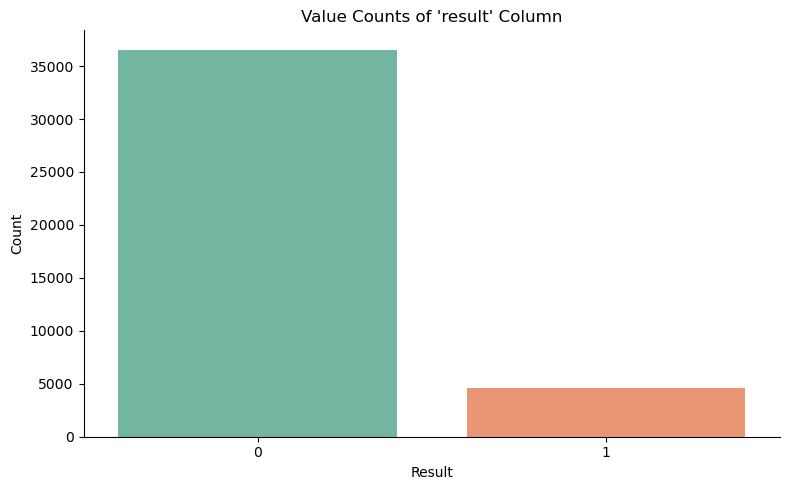

In [16]:
result_counts = df['result'].value_counts().reset_index()
result_counts.columns = ['result', 'count']

plt.figure(figsize=(8, 5))
sns.barplot(data=result_counts, x='result', y='count', palette='Set2')
plt.title("Value Counts of 'result' Column")
plt.xlabel("Result")
plt.ylabel("Count")
sns.despine()
plt.tight_layout()
plt.show()

## Train-Test Split

In [47]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='result')
y = df['result']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)

## Pipeline

In [48]:
from sklearn.pipeline import Pipeline
from category_encoders.target_encoder import TargetEncoder
from xgboost import XGBClassifier

In [49]:
scale = df['result'].value_counts()[0] / df['result'].value_counts()[1] 

estimators = [
    ('encoder', TargetEncoder()),
    ('clf', XGBClassifier(random_state=42, scale_pos_weight=scale))
]

## Hyperparameter Tuning

In [50]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

search_space = {
    'clf__max_depth': Integer(2, 8),
    'clf__learning_rate': Real(0.001, 1.0, prior='log-uniform'),
    'clf__subsample': Real(0.5, 1.0),
    'clf__colsample_bytree': Real(0.5, 1.0),
    'clf__colsample_bylevel': Real(0.5, 1.0),
    'clf__colsample_bynode': Real(0.5, 1.0),
    'clf__reg_alpha': Real(0.0, 10.0),
    'clf__reg_lambda': Real(0.0, 10.0),
    'clf__gamma': Real(0.0, 10.0),
    'clf__scale_pos_weight': Real(1.0, 10.0)
}

opt = BayesSearchCV(pipe, search_space, cv=20, n_iter=30, scoring='roc_auc', random_state=42)

## XGBoost Training

In [51]:
opt.fit(X_train, y_train)

BayesSearchCV(cv=20,
              estimator=Pipeline(steps=[('encoder', TargetEncoder()),
                                        ('clf',
                                         XGBClassifier(base_score=None,
                                                       booster=None,
                                                       callbacks=None,
                                                       colsample_bylevel=None,
                                                       colsample_bynode=None,
                                                       colsample_bytree=None,
                                                       device=None,
                                                       early_stopping_rounds=None,
                                                       enable_categorical=False,
                                                       eval_metric=None,
                                                       feature_types=None,
                                                       feature_weights=None,
                                                       gamma=None,
                                                       grow_policy=...
                             'clf__max_depth': Integer(low=2, high=8, prior='uniform', transform='normalize'),
                             'clf__reg_alpha': Real(low=0.0, high=10.0, prior='uniform', transform='normalize'),
                             'clf__reg_lambda': Real(low=0.0, high=10.0, prior='uniform', transform='normalize'),
                             'clf__scale_pos_weight': Real(low=1.0, high=10.0, prior='uniform', transform='normalize'),
                             'clf__subsample': Real(low=0.5, high=1.0, prior='uniform', transform='normalize')})

## Evaluation

In [52]:
opt.best_estimator_

Pipeline(steps=[('encoder',
                 TargetEncoder(cols=['job', 'marital', 'education', 'default',
                                     'housing', 'loan', 'contact', 'month',
                                     'day_of_week', 'poutcome'])),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=0.7991300809477555,
                               colsample_bynode=1.0,
                               colsample_bytree=0.9112827047719443, device=None,
                               early_stopping_rounds=None,
                               enab...
                               gamma=10.0, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.17344123938148853, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=8,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=None,
                               n_jobs=None, num_parallel_tree=None, ...))])

In [53]:
opt.best_score_

np.float64(0.7750602091104424)

In [54]:
opt.score(X_test, y_test)

np.float64(0.7854633473277041)

## Prediction

In [55]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = opt.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6480  830]
 [ 399  529]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      7310
           1       0.39      0.57      0.46       928

    accuracy                           0.85      8238
   macro avg       0.67      0.73      0.69      8238
weighted avg       0.88      0.85      0.86      8238



In [56]:
opt.predict_proba(X_test)

array([[0.57865834, 0.42134166],
       [0.30241114, 0.69758886],
       [0.1924671 , 0.8075329 ],
       ...,
       [0.31936044, 0.68063956],
       [0.80907774, 0.19092223],
       [0.7498216 , 0.2501784 ]], dtype=float32)

## Measure Feature Importance

In [57]:
opt.best_estimator_.steps

[('encoder',
  TargetEncoder(cols=['job', 'marital', 'education', 'default', 'housing', 'loan',
                      'contact', 'month', 'day_of_week', 'poutcome'])),
 ('clf',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=0.7991300809477555, colsample_bynode=1.0,
                colsample_bytree=0.9112827047719443, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, feature_weights=None,
                gamma=10.0, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=0.17344123938148853,
                max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=8, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_t

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

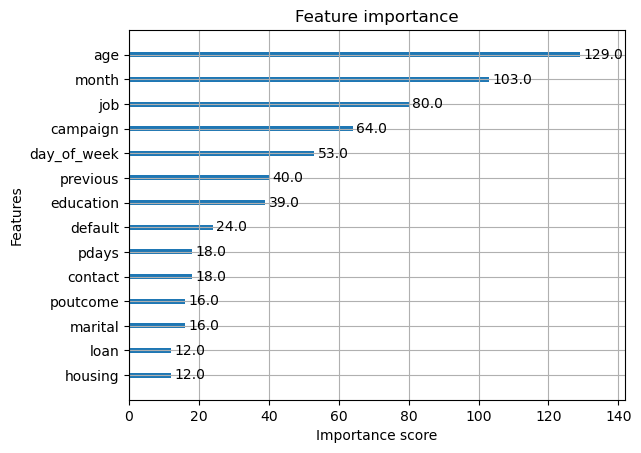

In [58]:
from xgboost import plot_importance

xgboost_step = opt.best_estimator_.steps[1]
xgboost_model = xgboost_step[1]
plot_importance(xgboost_model)